# Part A - Data summarization, data preprocessing and feature selections

## 1 -  Data Summarization

### Load the data set and show types 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import time 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import OneClassSVM

In [2]:
df= pd.read_csv('Base.csv')
print(df.dtypes)

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

### Data cleaning

In [3]:
# Detect missing values
missing_values = df.isnull().sum()
print("Missing values in each attribute:\n", missing_values)

Missing values in each attribute:
 fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source         

In [4]:
# Detect duplicates 
duplicates = df.duplicated()
print("Number of duplicate records:", duplicates.sum())
df = df.drop_duplicates()

Number of duplicate records: 0


### Data type transformation

In [6]:
# Changing data types for columns where values are 0 or 1 to boolean instead of int64
df['foreign_request']=df['foreign_request'].astype('bool')
df['fraud_bool']=df['fraud_bool'].astype('bool')
df['phone_home_valid']=df['phone_home_valid'].astype('bool')
df['phone_mobile_valid']=df['phone_mobile_valid'].astype('bool')
df['has_other_cards']=df['has_other_cards'].astype('bool')
df['keep_alive_session']=df['keep_alive_session'].astype('bool')

### Statistics of the dataset 

In [7]:
# Descriptive statistics for numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object'])

# Numerical attributes
num_desc_stats = numerical_attributes.describe()
print("Descriptive statistics for numerical attributes:\n", num_desc_stats)

# Categorical attributes
cat_freq_dist = categorical_attributes.apply(pd.Series.value_counts)
print("Frequency distribution for categorical attributes:\n", cat_freq_dist)

Descriptive statistics for numerical attributes:
                income  name_email_similarity  prev_address_months_count  \
count  1000000.000000         1000000.000000             1000000.000000   
mean         0.562696               0.493694                  16.718568   
std          0.290343               0.289125                  44.046230   
min          0.100000               0.000001                  -1.000000   
25%          0.300000               0.225216                  -1.000000   
50%          0.600000               0.492153                  -1.000000   
75%          0.800000               0.755567                  12.000000   
max          0.900000               0.999999                 383.000000   

       current_address_months_count    customer_age  days_since_request  \
count                1000000.000000  1000000.000000        1.000000e+06   
mean                      86.587867       33.689080        1.025705e+00   
std                       88.406599       12.0257

### Centrality and dispersion overview # Source : https://hevodata.com/learn/data-summarization-in-data-mining/#intro

In [8]:
for col in numerical_attributes:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    std_dev = df[col].std()
    data_range = df[col].max() - df[col].min()

    print(f"{col}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Range: {data_range}\n")

    

income:
Mean: 0.5626956000000002
Median: 0.6
Mode: 0.9
Standard Deviation: 0.29034260114469257
Range: 0.8

name_email_similarity:
Mean: 0.49369409496301203
Median: 0.4921525275
Mode: 9.85e-05
Standard Deviation: 0.28912479999472357
Range: 0.999997888

prev_address_months_count:
Mean: 16.718568
Median: -1.0
Mode: -1
Standard Deviation: 44.046230032770744
Range: 384

current_address_months_count:
Mean: 86.587867
Median: 52.0
Mode: 6
Standard Deviation: 88.4065991038965
Range: 429

customer_age:
Mean: 33.68908
Median: 30.0
Mode: 30
Standard Deviation: 12.025798658443994
Range: 80

days_since_request:
Mean: 1.025705230995871
Median: 0.0151757375
Mode: 3.22e-05
Standard Deviation: 5.381834634595605
Range: 78.45690383595999

intended_balcon_amount:
Mean: 8.661498537175015
Median: -0.8305065444999999
Mode: -1.738736289
Standard Deviation: 20.236154606258463
Range: 128.48748254

zip_count_4w:
Mean: 1572.692049
Median: 1263.0
Mode: 1020
Standard Deviation: 1005.3745649573584
Range: 6699

veloci

### Distribution overview -  Data Visualization

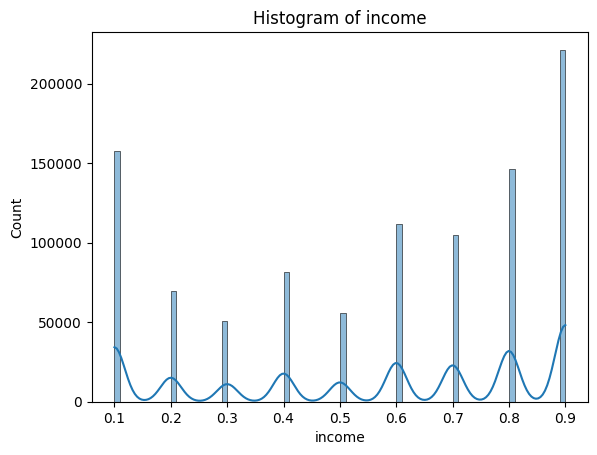

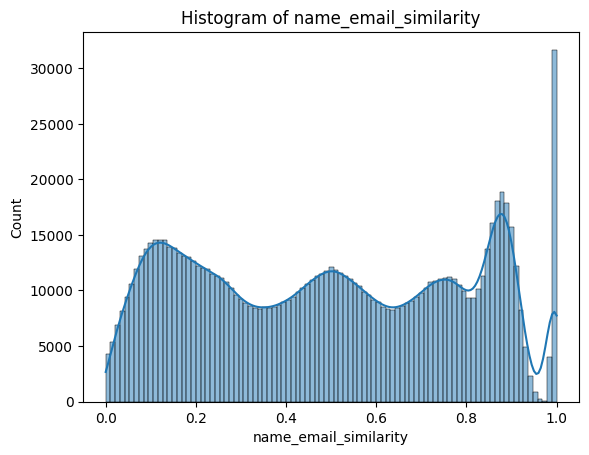

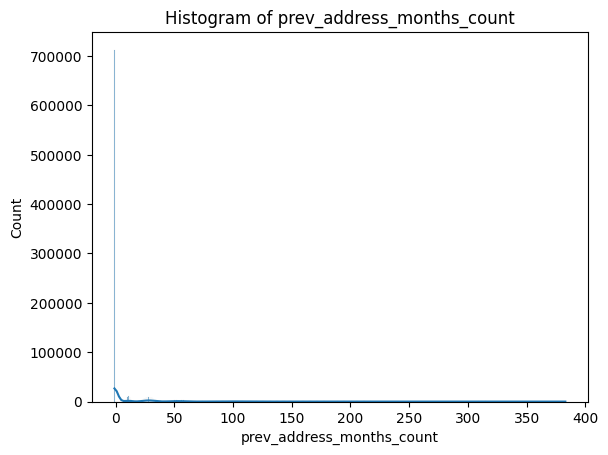

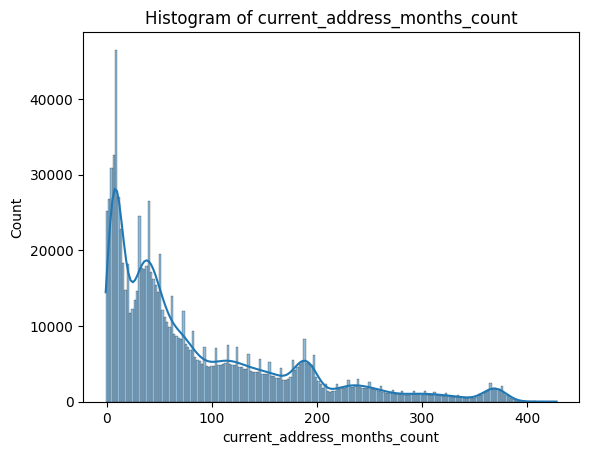

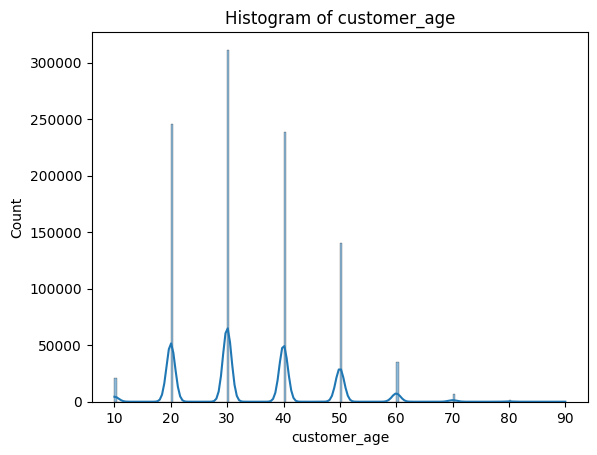

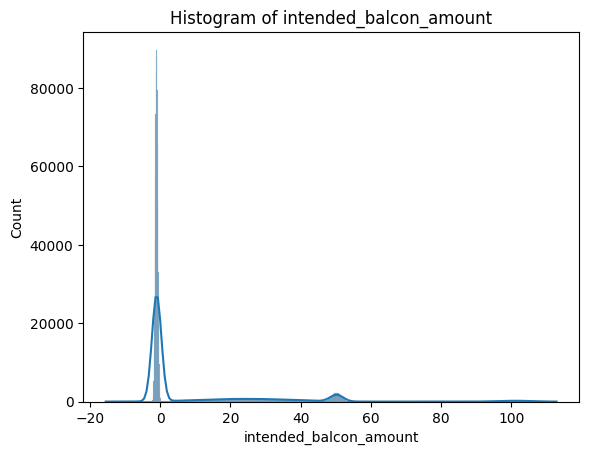

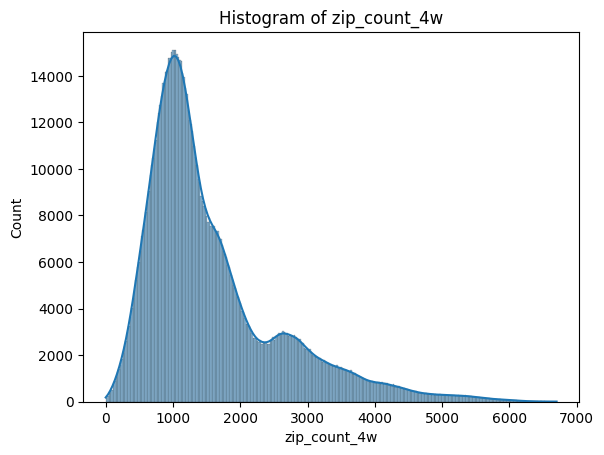

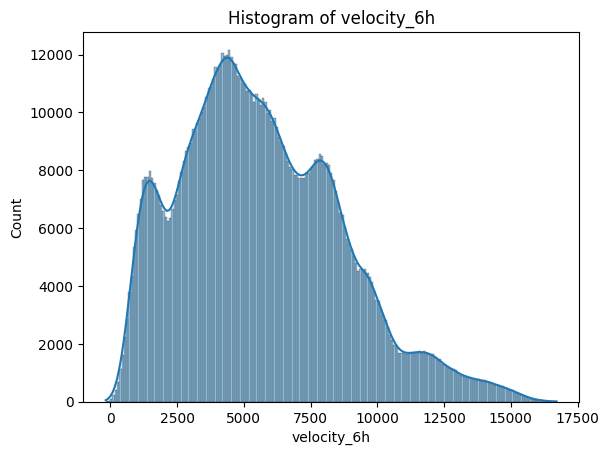

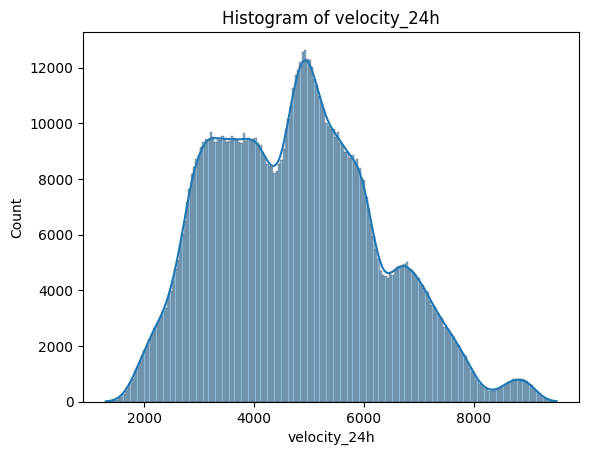

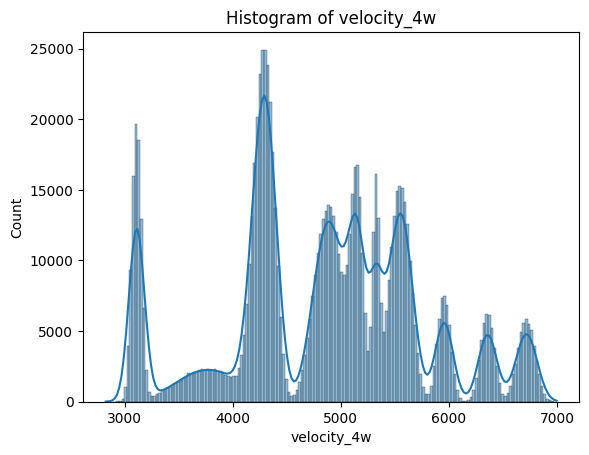

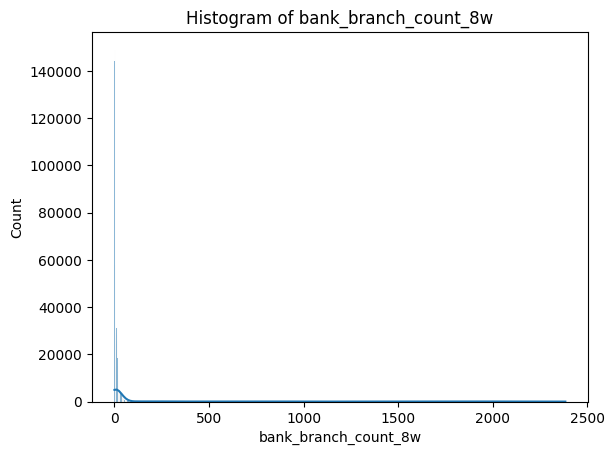

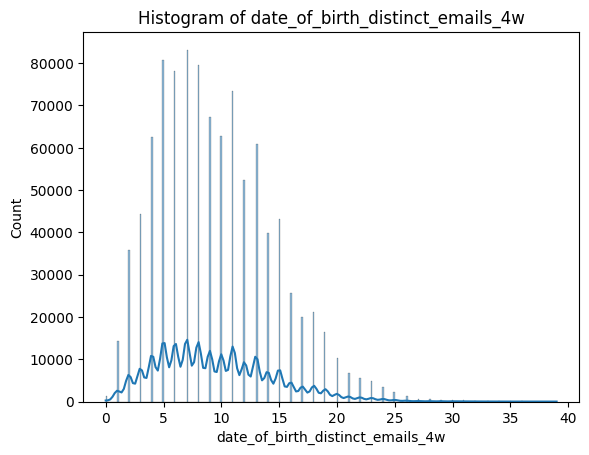

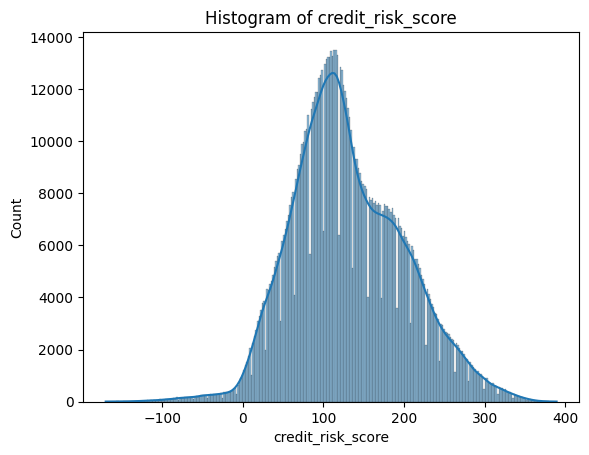

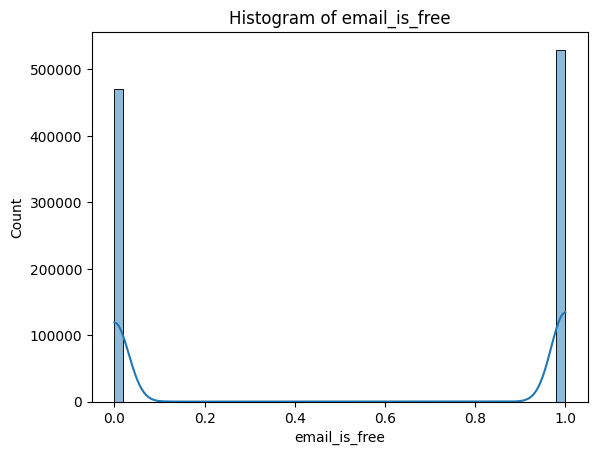

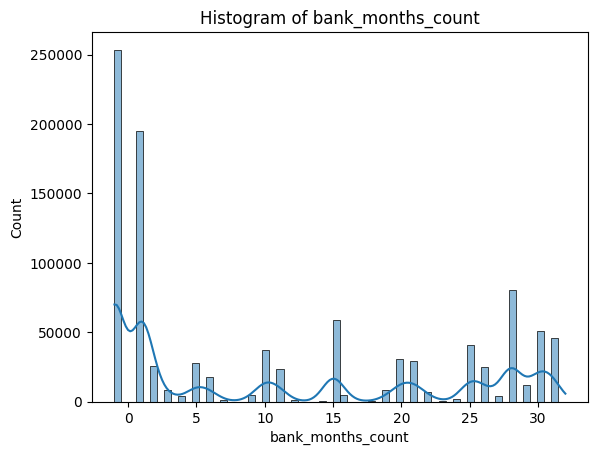

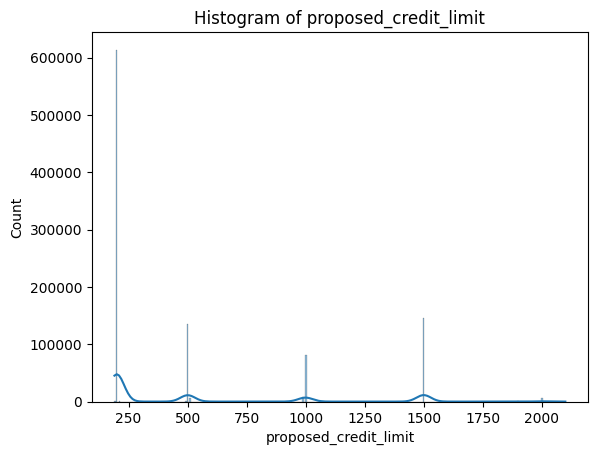

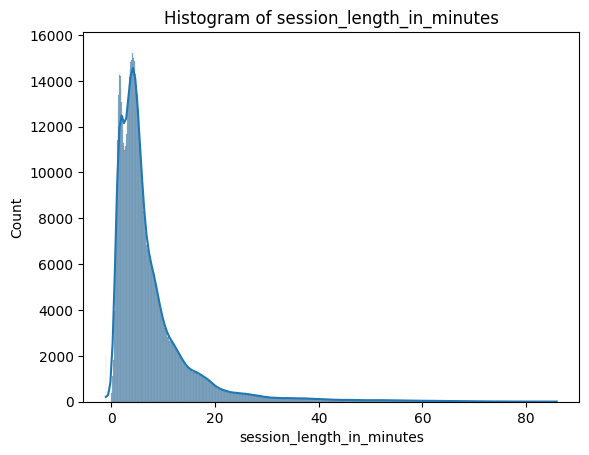

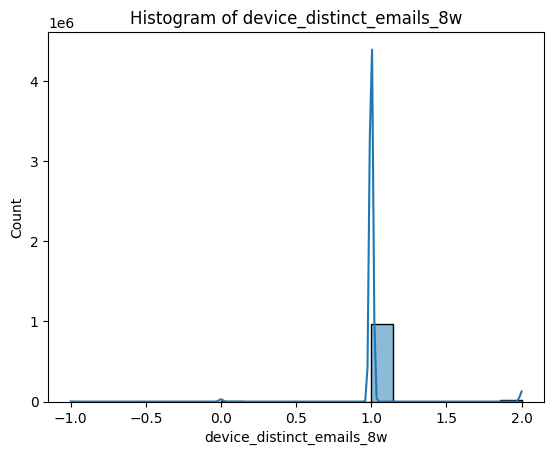

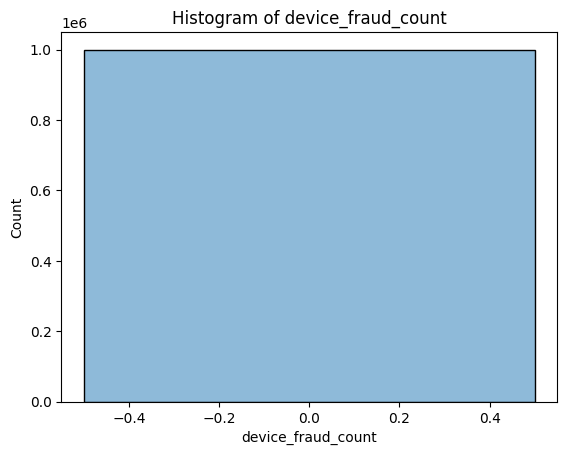

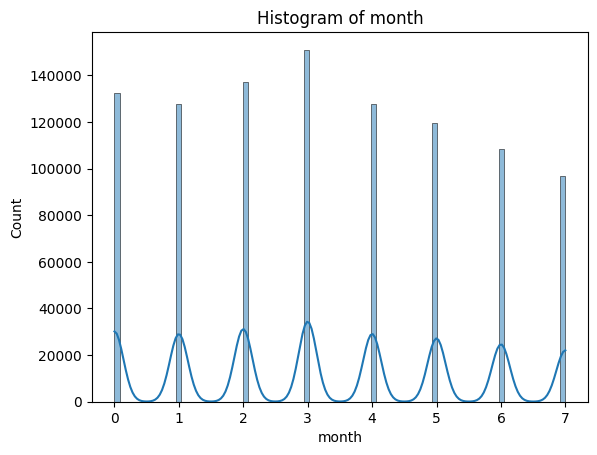

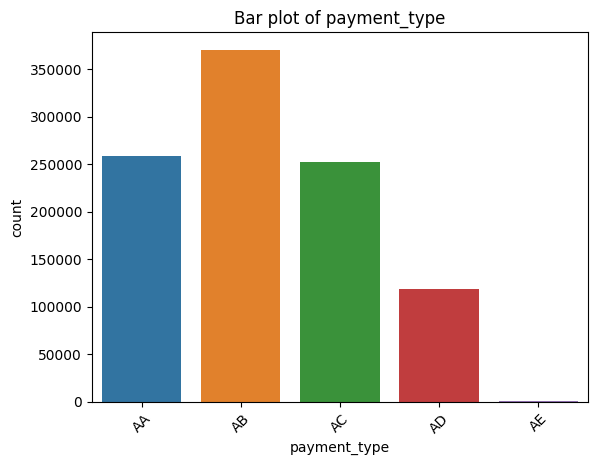

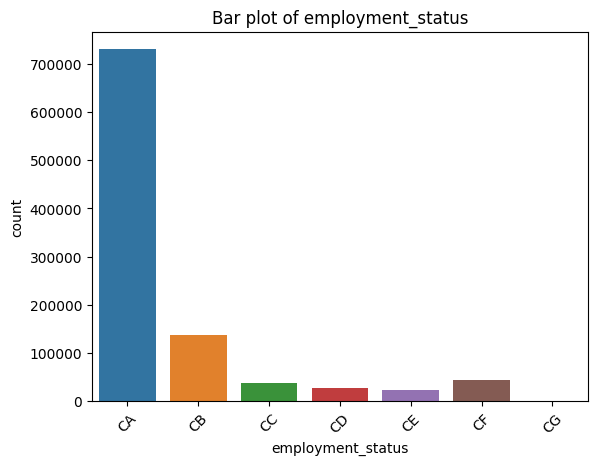

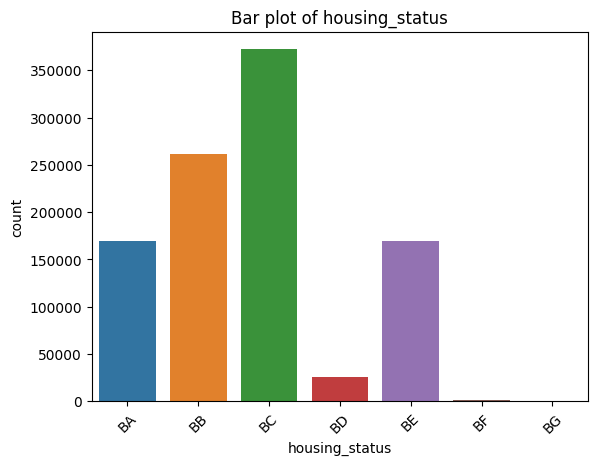

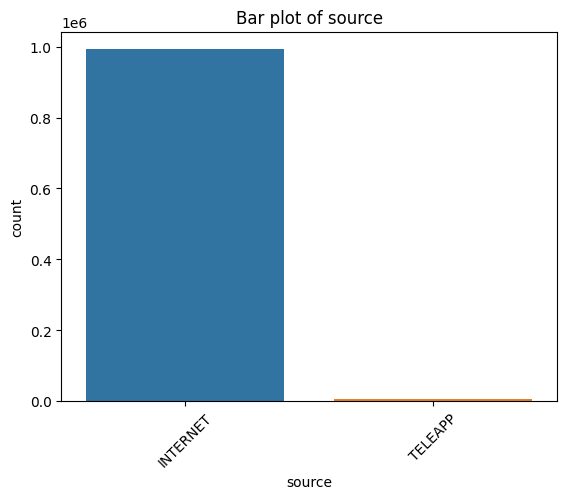

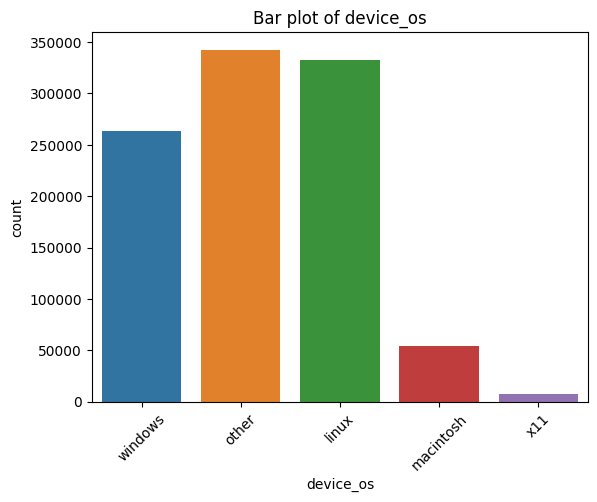

In [9]:
# Plot histograms for each numerical attribute
# Histograms should help us  visualize the distribution of each numerical attribute, identify skewness,
# and detect the presence of any outliers. Overal state of our data 

for col in numerical_attributes:
    if (col == 'days_since_request'): 
        continue
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Plot bar plots for each categorical attribute
# Bar plots display the frequency distribution of categorical attributes, which helps identify 
# the most common categories and any imbalances in the data.
# This is useful for understanding the overall composition of the 
# dataset and determining if any categories need further investigation or resampling.

for col in categorical_attributes:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Bar plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

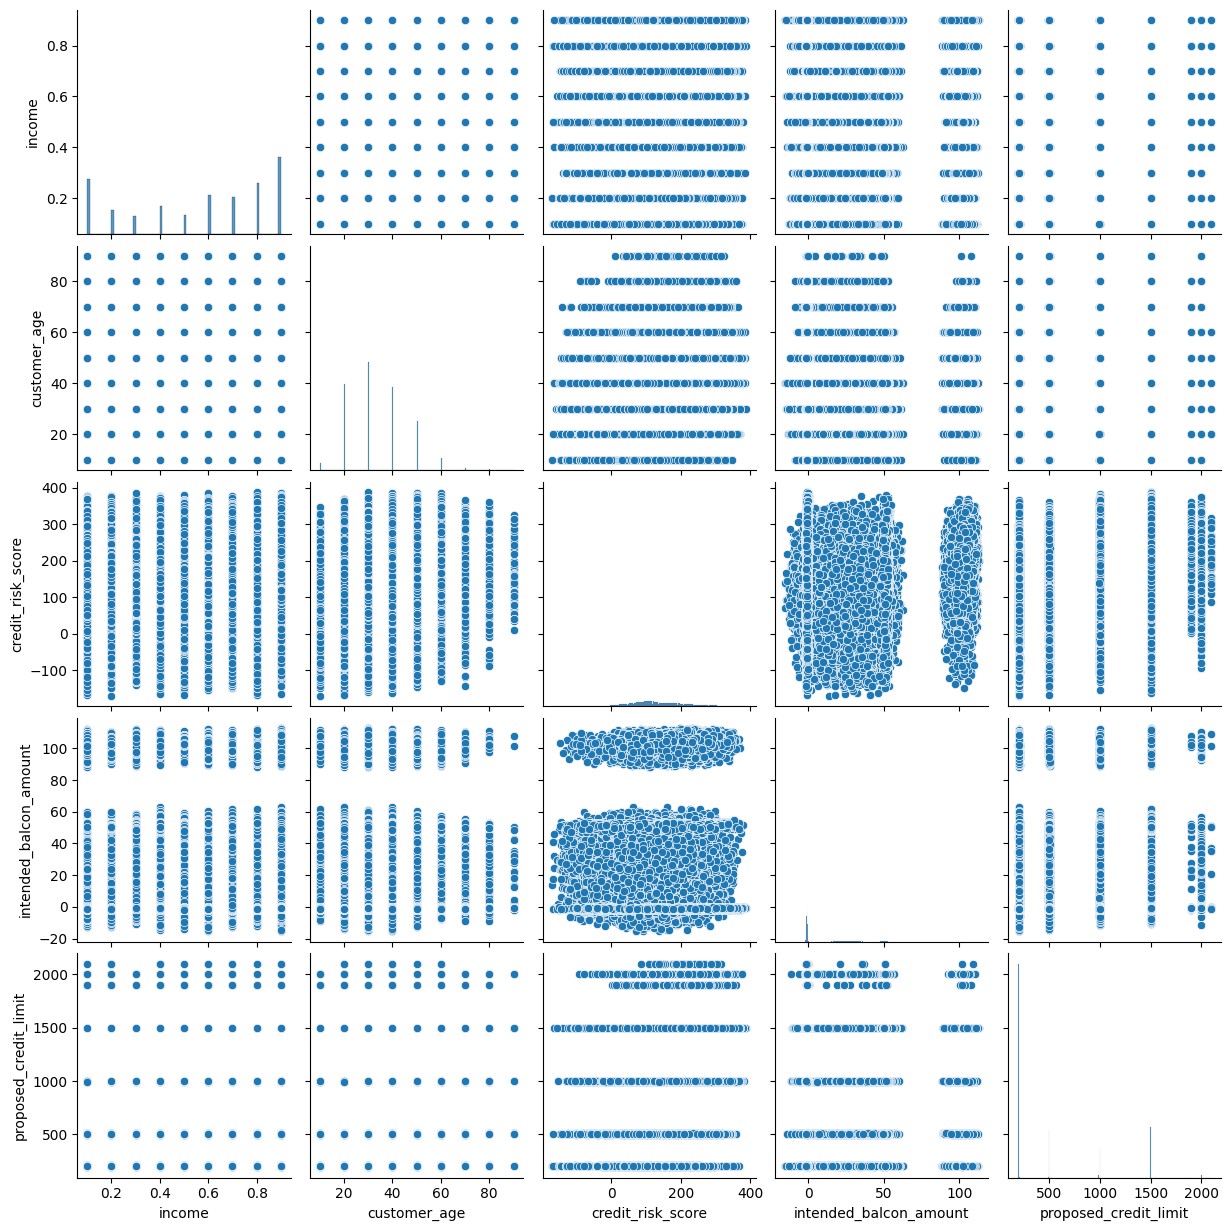

In [10]:
# Plot pair plot for selected attributes
# Pair plots should provide a quick overview of the relationships between pairs of numerical attributes.
# They could reveal patterns, trends, and correlations between variables, which can be useful for identifying 
# potential predictors of fraud
selected_attributes = ['income', 'customer_age', 'credit_risk_score', 'intended_balcon_amount','proposed_credit_limit']
# Note: I believe that intended_balcon_amount and the proposed_credit_limit could be relevant as fraudsters might 
# want to be careful when it comes to the amount they steal and the proportion it has on the target's credit limit
sns.pairplot(df[selected_attributes])
plt.show()


## 2 - Data transformation

### Handling categorical attributes

In [11]:
# Instantiate the OneHotEncoder object
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(categorical_attributes)

# Create a new DataFrame with the transformed columns
#encoded_columns = encoder.get_feature_names_out(categorical_attributes.columns)
encoded_columns = encoder.get_feature_names(categorical_attributes.columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

# Merge the transformed DataFrame with the original DataFrame
df = pd.concat([df.drop(categorical_attributes.columns, axis=1), encoded_df], axis=1)

# Print part of the result
print("Data after one-hot encoding:")
print(df.head())



c:\Users\kates\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Data after one-hot encoding:
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0        True     0.9               0.166828                         -1   
1        True     0.9               0.296286                         -1   
2        True     0.9               0.044985                         -1   
3        True     0.9               0.159511                         -1   
4        True     0.9               0.596414                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50            0.020925   
1                           144            50            0.005418   
2                           132            40            3.108549   
3                            22            50            0.019079   
4                           218            50            0.004441   

   intended_balcon_amount  zip_count_4w   velocity_6h  ...  housing_status_BE  \
0               -1.33134

### Normalization of numeric attributes

In [12]:
# Normalize numerical attributes using MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = numerical_attributes.columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print part of the result
print("Data after normalization:")
print(df.head())

Data after normalization:
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0        True     1.0               0.166827                        0.0   
1        True     1.0               0.296285                        0.0   
2        True     1.0               0.044984                        0.0   
3        True     1.0               0.159510                        0.0   
4        True     1.0               0.596414                        0.0   

   current_address_months_count  customer_age  days_since_request  \
0                      0.207459         0.500            0.000267   
1                      0.337995         0.500            0.000069   
2                      0.310023         0.375            0.039621   
3                      0.053613         0.500            0.000243   
4                      0.510490         0.500            0.000057   

   intended_balcon_amount  zip_count_4w  velocity_6h  ...  housing_status_BE  \
0                0.110510   

### Saving data frame for Part C experiment 

In [13]:
df_partC = df 

### Outliers 

In [14]:
# remove exceptional outliers 
df = df[df['customer_age'] < 70 ]
df = df[df['velocity_6h'] < 13000]

<Axes: xlabel='customer_age'>

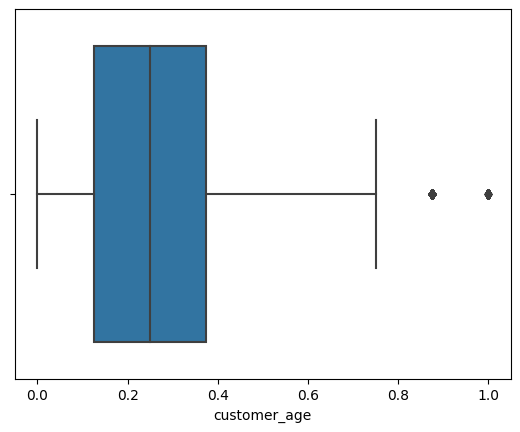

In [15]:
sns.boxplot(x=df['customer_age'])

<Axes: xlabel='velocity_6h'>

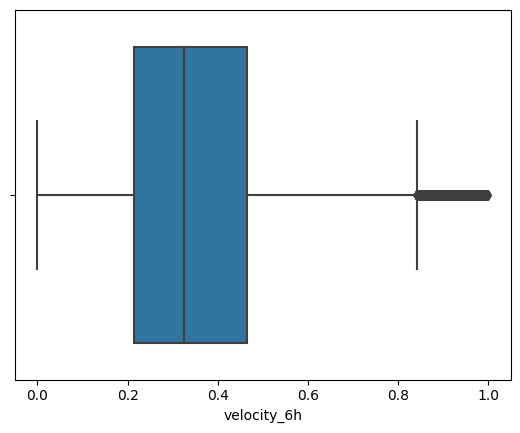

In [16]:
sns.boxplot(x=df['velocity_6h'])

### Feature selection - Select relevant and not redundant attributes

Feature engineering 

In [17]:
# Merging phone_home_valud and phone_mobile_valid with an OR statement to just obtain phone_valid
df['phone_valid'] = df['phone_home_valid'] | df['phone_mobile_valid']
# Droping the columns after merge
df = df.drop(['phone_home_valid', 'phone_mobile_valid'], axis=1)

Drop not relevant columns

In [18]:
df = df.drop(["zip_count_4w", "bank_branch_count_8w","date_of_birth_distinct_emails_4w","email_is_free","bank_months_count","month","device_fraud_count"], axis=1) 
print(df.dtypes) 

fraud_bool                         bool
income                          float64
name_email_similarity           float64
prev_address_months_count       float64
current_address_months_count    float64
customer_age                    float64
days_since_request              float64
intended_balcon_amount          float64
velocity_6h                     float64
velocity_24h                    float64
velocity_4w                     float64
credit_risk_score               float64
has_other_cards                    bool
proposed_credit_limit           float64
foreign_request                    bool
session_length_in_minutes       float64
keep_alive_session                 bool
device_distinct_emails_8w       float64
payment_type_AA                 float64
payment_type_AB                 float64
payment_type_AC                 float64
payment_type_AD                 float64
payment_type_AE                 float64
employment_status_CA            float64
employment_status_CB            float64


### Feature selection - Tree based 

In [19]:
# Separate the target variable from the features
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']

# Create an ExtraTreesClassifier object
clf = ExtraTreesClassifier(n_estimators=50)

# Fit the ExtraTreesClassifier to the data
clf.fit(X, y)

# Create a SelectFromModel object using the fitted ExtraTreesClassifier
sfm = SelectFromModel(clf, prefit=True)

# Use the SelectFromModel object to transform the feature matrix
X_selected = sfm.transform(X)

# Print the shape of the original and selected feature matrices
print("Original shape:", X.shape)
print("Selected shape:", X_selected.shape)


c:\Users\kates\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original shape: (1000000, 44)
Selected shape: (1000000, 12)


In [20]:
print(X_selected)

[[1.         0.16682666 0.20745921 ... 0.63506261 0.16230366 0.05625043]
 [1.         0.2962852  0.33799534 ... 0.76744186 0.68586387 0.37743547]
 [1.         0.04498415 0.31002331 ... 0.62075134 0.0052356  0.06592361]
 ...
 [0.875      0.87940355 0.07226107 ... 0.41860465 0.0052356  0.10581843]
 [1.         0.76211233 0.44289044 ... 0.59570662 0.16230366 0.06140525]
 [0.125      0.69745247 0.75058275 ... 0.36851521 0.0052356  0.08880435]]


In [21]:
# Get a boolean mask of the selected features
selected_mask = sfm.get_support()

# Get the names of the selected columns
selected_columns = X.columns[selected_mask]

# Get the names of the dropped columns
dropped_columns = X.columns[~selected_mask]

# Print the names of the dropped columns
print("Dropped columns:", dropped_columns)

Dropped columns: Index(['prev_address_months_count', 'has_other_cards', 'foreign_request',
       'keep_alive_session', 'device_distinct_emails_8w', 'payment_type_AA',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'employment_status_CG', 'housing_status_BA',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'housing_status_BF', 'housing_status_BG',
       'source_INTERNET', 'source_TELEAPP', 'device_os_linux',
       'device_os_macintosh', 'device_os_other', 'device_os_windows',
       'device_os_x11', 'phone_valid'],
      dtype='object')


In [22]:
# Get a boolean mask of the selected features
selected_mask = sfm.get_support()

# Get the names of the selected columns
selected_columns = X.columns[selected_mask]

# Print the names of the selected columns
print("Selected columns:", selected_columns)

Selected columns: Index(['income', 'name_email_similarity', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'credit_risk_score',
       'proposed_credit_limit', 'session_length_in_minutes'],
      dtype='object')


## Feature Selection - L1-Based

In [23]:
# Separate the target variable from the features
X2 = df.drop('fraud_bool', axis=1)
y2 = df['fraud_bool']

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X2, y2)
model = SelectFromModel(lsvc, prefit=True)
X2_selected = model.transform(X2)

# Print the shape of the original and selected feature matrices
print("Original shape:", X2.shape)
print("Selected shape:", X2_selected.shape)

c:\Users\kates\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kates\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original shape: (1000000, 44)
Selected shape: (1000000, 33)


# Part B - Classification (Supervised Learning)

## Approach 1: Decision Trees (Tree based feature selection)

In [24]:
start_time = time.time() # Record start time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.34, random_state=42)

# Create a Decision Tree classifier object
dt = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))

Accuracy: 0.9768911764705882
              precision    recall  f1-score   support

       False       0.99      0.99      0.99    336189
        True       0.05      0.06      0.06      3811

    accuracy                           0.98    340000
   macro avg       0.52      0.53      0.52    340000
weighted avg       0.98      0.98      0.98    340000

Time taken: 0 minutes and 17 seconds


## Approach 1: Decision Trees (L1 based feature selection)

In [25]:
start_time = time.time() # Record start time

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_selected, y2, test_size=0.34, random_state=42)

# Create a Decision Tree classifier object
dt = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
dt.fit(X2_train, y2_train)

# Make predictions on the test data
y2_pred = dt.predict(X2_test)

end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))

Accuracy: 0.9774970588235294
              precision    recall  f1-score   support

       False       0.99      0.99      0.99    336189
        True       0.07      0.08      0.07      3811

    accuracy                           0.98    340000
   macro avg       0.53      0.53      0.53    340000
weighted avg       0.98      0.98      0.98    340000

Time taken: 0 minutes and 17 seconds


## Approach 2 : Gradient Boosting (L1-based Feature selection)

In [26]:
start_time = time.time() # Record start time

# Split data into training and testing 
X3_train, X3_test, y3_train, y3_test = train_test_split(X2, y2, test_size=0.34,random_state=42)

# Create a GradientBoostingClassifier object 
model = GradientBoostingClassifier()
model.fit(X3_train, y3_train) # Train the data on the model 

y3_pred = model.predict(X3_test) #Make predictions on the test data 
end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
accuracy = accuracy_score(y3_test, y3_pred)
print("Accuracy:", accuracy)
print(classification_report(y3_test, y3_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))

Accuracy: 0.9887588235294118
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    336189
        True       0.47      0.02      0.04      3811

    accuracy                           0.99    340000
   macro avg       0.73      0.51      0.52    340000
weighted avg       0.98      0.99      0.98    340000

Time taken: 5 minutes and 44 seconds


  ## Approach 2: Gradient Boosting (Tree-based Feature selection)

In [27]:
start_time = time.time() # Record start time

# Split data into training and testing 
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.34,random_state=42)

# Create a GradientBoostingClassifier object 
model = GradientBoostingClassifier()
model.fit(X4_train, y4_train) # Train the data on the model 

y4_pred = model.predict(X4_test) #Make predictions on the test data 
end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
accuracy = accuracy_score(y4_test, y4_pred)
print("Accuracy:", accuracy)
print(classification_report(y4_test, y4_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))

Accuracy: 0.9887588235294118
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    336189
        True       0.47      0.02      0.04      3811

    accuracy                           0.99    340000
   macro avg       0.73      0.51      0.52    340000
weighted avg       0.98      0.99      0.98    340000

Time taken: 5 minutes and 30 seconds


## Approach 3: Random Forest Algorithms 

### L1-based 

In [28]:
start_time = time.time() # Record start time

# Split the dataset into training and test sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X2, y2, test_size=0.34,random_state=42)

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf.fit(X5_train, y5_train)

# Predict the labels of the test set
y5_pred = rf.predict(X5_test)

end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
accuracy = accuracy_score(y5_test, y5_pred)
print("Accuracy:", accuracy)
print(classification_report(y5_test, y5_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))


Accuracy: 0.9887941176470588
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    336189
        True       0.55      0.00      0.00      3811

    accuracy                           0.99    340000
   macro avg       0.77      0.50      0.50    340000
weighted avg       0.98      0.99      0.98    340000

Time taken: 3 minutes and 31 seconds


### Tree-based 

In [29]:
start_time = time.time() # Record start time

# Split the dataset into training and test sets
X6_train, X6_test, y6_train, y6_test = train_test_split(X, y, test_size=0.34,random_state=42)

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf.fit(X6_train, y6_train)

# Predict the labels of the test set
y6_pred = rf.predict(X6_test)

end_time = time.time() # Record end time 

# Evaluate the performance of the classifier
accuracy = accuracy_score(y6_test, y6_pred)
print("Accuracy:", accuracy)
print(classification_report(y6_test, y6_pred))

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))

Accuracy: 0.9887941176470588
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    336189
        True       0.55      0.00      0.00      3811

    accuracy                           0.99    340000
   macro avg       0.77      0.50      0.50    340000
weighted avg       0.98      0.99      0.98    340000

Time taken: 3 minutes and 38 seconds


### Confusion Matrix


In [30]:
# Decision Trees
# Tree-based feature selection
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Decision Trees using Tree-based :")
print(cm1)

#L1-based feature selection
cm2 = confusion_matrix(y2_test, y2_pred)
print("Confusion matrix for Decision Trees using L1-based :")
print(cm2)

# Gradient Boosting
# Tree-based feature selection
cm3 = confusion_matrix(y4_test, y4_pred)
print("Confusion matrix for Gradient Boosting using Tree-based :")
print(cm3)

#L1-based feature selection
cm4 = confusion_matrix(y3_test, y3_pred)
print("Confusion matrix for Gradient Boosting using L1-based :")
print(cm4)

# Random Forest algorithms 
# Tree-based Feature selection
cm5 = confusion_matrix(y6_test, y6_pred)
print("Confusion matrix for RandomForest Algorithms using tree-based:")
print(cm5)

#L1-based feature selection
cm6 = confusion_matrix(y5_test, y5_pred)
print("Confusion matrix for RandomForest Algorithms using L1-based :")
print(cm6)


Confusion matrix for Decision Trees using Tree-based :
[[331898   4291]
 [  3566    245]]
Confusion matrix for Decision Trees using L1-based :
[[332055   4134]
 [  3517    294]]
Confusion matrix for Gradient Boosting using Tree-based :
[[336091     98]
 [  3724     87]]
Confusion matrix for Gradient Boosting using L1-based :
[[336091     98]
 [  3724     87]]
Confusion matrix for RandomForest Algorithms using tree-based:
[[336184      5]
 [  3805      6]]
Confusion matrix for RandomForest Algorithms using L1-based :
[[336184      5]
 [  3805      6]]


# Part C - Detecting Outliers: (Bonus)

In [31]:
print(df_partC.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0        True     1.0               0.166827                        0.0   
1        True     1.0               0.296285                        0.0   
2        True     1.0               0.044984                        0.0   
3        True     1.0               0.159510                        0.0   
4        True     1.0               0.596414                        0.0   

   current_address_months_count  customer_age  days_since_request  \
0                      0.207459         0.500            0.000267   
1                      0.337995         0.500            0.000069   
2                      0.310023         0.375            0.039621   
3                      0.053613         0.500            0.000243   
4                      0.510490         0.500            0.000057   

   intended_balcon_amount  zip_count_4w  velocity_6h  ...  housing_status_BE  \
0                0.110510      0.114644     0.640842  

In [ ]:
# Train the OneClassSVM model
# You can adjust the nu and kernel parameters as needed
start_time = time.time() # Record start time
print("Starting")
ocsvm = OneClassSVM(nu=0.1, kernel='linear', gamma='scale')
print("Model initialized")
ocsvm.fit(df_partC)
print("Fit completed")

# Predict the outliers
outlier_predictions = ocsvm.predict(df_partC)
print("Predictions completed")
# Add outlier predictions to the DataFrame
df_partC['Outlier'] = outlier_predictions
end_time = time.time() # Record end time 

# Calculate time taken in minutes and seconds 
time_taken = end_time - start_time
minutes = int(time_taken // 60)
seconds = int(time_taken % 60)

print("Time taken: {} minutes and {} seconds".format(minutes, seconds))
# Print the DataFrame with the detected outliers
# Outliers are marked as -1, and inliers are marked as 1
print(df_partC)
